In [1]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
extend_df = pd.read_csv('/home/jupyter-zyh/Gnhe/analysis_profile/global_setting/Linear/Texas/profile-1/all.csv')
extend_df = extend_df.query("trial == 'simulated'")
extend_df['centroid'] = False
extend_df_c = extend_df.copy()
extend_df['centroid'] = True

In [17]:
df = pd.read_csv('/home/jupyter-zyh/Gnhe/analysis_setting/centroid/Linear/all.csv')
df = df.append(extend_df).append(extend_df_c)
df.to_csv('/home/jupyter-zyh/Gnhe/analysis_setting/centroid/Linear/merged.csv')

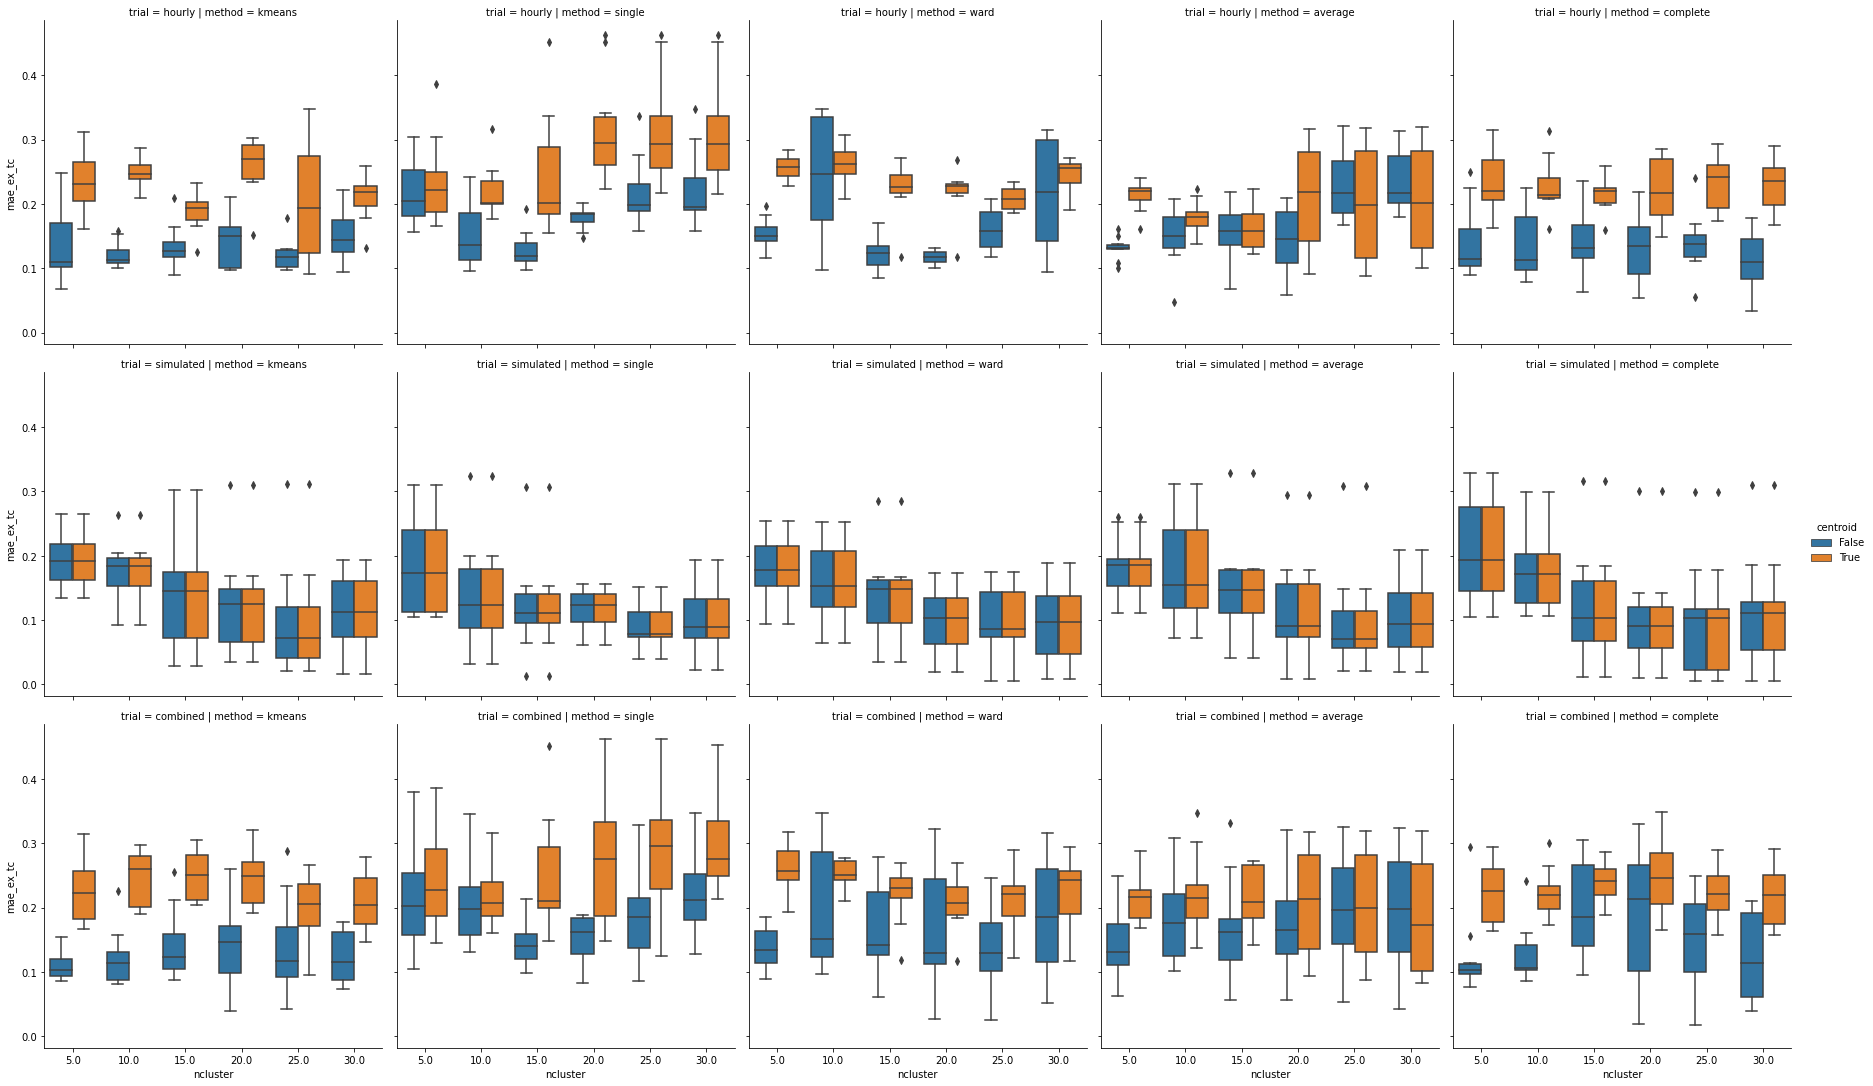

In [5]:
sns.catplot(data=df,col='method',row='trial',row_order=['hourly','simulated','combined'],x='ncluster',y='mae_ex_tc',hue='centroid',kind='box')

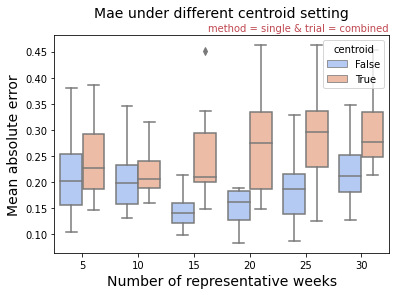

In [14]:
query_string = "method == 'single' and trial == 'combined'"
p = sns.boxplot(data=df.query(query_string),x='ncluster',y='mae_ex_tc',hue='centroid',palette='coolwarm')
plt.title('Mae under different centroid setting',pad=18,fontdict={'size':14})
plt.text(s=query_string.replace("'","").replace("==","=").replace("and","&"),x=2.25,y=0.49,color='#c04851')
plt.xlabel('Number of representative weeks',fontdict={'size':14})
plt.xticks([0,1,2,3,4,5],['5','10','15','20','25','30'])
plt.ylabel('Mean absolute error',fontdict={'size':14})
plt.legend(title='centroid',loc='upper right')

In [15]:
p.get_figure().savefig(
    '/home/jupyter-zyh/Gnhe/analysis/images/setting/centroid/mae_under_different_centroid_setting.png',
    dpi=300)